In [50]:
import numpy as np
import theano
import theano.tensor as T
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
%matplotlib inline

In [51]:
X = pd.read_csv("../dat/wine_quality/wine_zeroone.csv",header=None).values
X_mask = X.copy()
X_mask[X != 0] = 1

In [136]:
epoch = 200
test_p = 0.1
nn_hdim = 4
lambda_reg = 0.001
epsilon = 1e-4 #learning rate for GD
reg_lambda = 0.01
nn_input_dim = X.shape[1]
nn_output_dim = X.shape[1]
L = []

In [137]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [138]:
def autoRec(epoch):
    Flag = True
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    z2 = np.zeros((1, nn_output_dim))
    L.clear()
    for i in range(0, epoch):
    #     if i > 600 and Flag:
    #         epsilon *= 0.5
    #         Flag = False

        # Forward propagation

        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        loss = np.sum(np.square(X - z2) * X_mask)
        loss += (reg_lambda/2) * (1.0/ X.shape[0]) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        L.append(loss)
        print("Loss: " + str(loss) + ", Round: " + str(i))

        # Backpropagation
        delta3 = (z2 - X) * X_mask
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (a1 * (1 - a1))
        dW1 = np.dot((X * X_mask).T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
    return z2

In [139]:
np.random.seed(0)
res = autoRec(epoch)

Loss: 5461.20226631, Round: 0
Loss: 2319.98005336, Round: 1
Loss: 1100.21149861, Round: 2
Loss: 599.142021775, Round: 3
Loss: 388.22094733, Round: 4
Loss: 298.364186048, Round: 5
Loss: 259.794692349, Round: 6
Loss: 243.115796481, Round: 7
Loss: 235.818104326, Round: 8
Loss: 232.5505774, Round: 9
Loss: 231.017464974, Round: 10
Loss: 230.231998619, Round: 11
Loss: 229.769500802, Round: 12
Loss: 229.447026949, Round: 13
Loss: 229.185705366, Round: 14
Loss: 228.951508152, Round: 15
Loss: 228.72974311, Round: 16
Loss: 228.514059915, Round: 17
Loss: 228.301708881, Round: 18
Loss: 228.091495161, Round: 19
Loss: 227.882895613, Round: 20
Loss: 227.675677411, Round: 21
Loss: 227.469733277, Round: 22
Loss: 227.265010287, Round: 23
Loss: 227.061479091, Round: 24
Loss: 226.859120608, Round: 25
Loss: 226.657920269, Round: 26
Loss: 226.457865531, Round: 27
Loss: 226.258944796, Round: 28
Loss: 226.061146948, Round: 29
Loss: 225.864461146, Round: 30
Loss: 225.668876739, Round: 31
Loss: 225.474383227, R

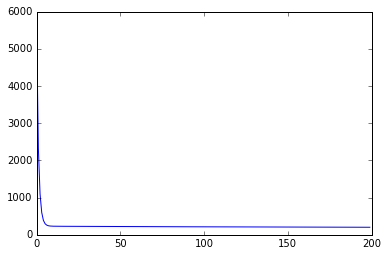

In [140]:
plt.plot(L)

In [141]:
def calRMSE(result, oracle):
    return np.sum((result - oracle.values) ** 2)

In [142]:
X_oracle = pd.read_csv("../dat/wine_quality/wine_zeroone_oracle.csv",header=None)
calRMSE(res, X_oracle)

304.21668807574838